# WeRateDogs Twitter Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analysing">Analysis and Visualization </a></li>
</ul>

<a id='intro'></a>
## Introduction

> **WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." **WeRateDogs** has over 4 million followers and has received international media coverage.

>  The ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. We'll need to assess and clean these columns if we want to use them for analysis and visualization.

> Here In this Notebook , we'll work through all the data we have to gather from different sources and make the data ready for analysis and visualization.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import tweepy
%matplotlib inline
plt.rcParams["figure.figsize"] = [11, 9]

<a id="gathering"></a>
## Data Gathering:

> We have the __WeRateDogs__ twitter archive data which was enhanced and provided to us by __Udacity__, which is in __csv__ format.

> We need to download __tweet image predictions__ file which was hosted on an __Udacity's server__ using __requests__ library.It is __.tsv__ file which has all predictions of breed of dog according to a __NeuralNetwork__.

> We need to gather the Each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive, query the __Twitter API__ for each tweet's JSON data using Python's __Tweepy__ library and store each tweet's entire set of JSON data in a file called __tweet_json.txt__ file. Then we need to load the data into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 


#### Twitter archive dataset columns:
- __tweet_id__: the unique id of each tweet.
- __in_reply_to_status_id__: if the represented Tweet is a reply, this field will contain the integer format of the original Tweet’s ID.
- __in_reply_to_user_id__: if the represented Tweet is a reply, this field will contain the integer format of the original Tweet’s author ID.
- __timestamp__: time when this Tweet was created.
- __source__: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android,Twitter for iPhone,WebClient,TweetDeck,Vine.
- __text__: actual UTF-8 text of the status update.
- __retweeted_status_id__: this field will contain the integer representation of the original Tweet’s ID if the represented Tweet is a retweet.
- __retweeted_status_user_id__: this field will contain the integer representation of the original Tweet’s author ID if the represented Tweet is a retweet.
- __retweeted_status_timestamp__: timestamp of retweet.
- __expanded_urls__: tweet URL.
- __rating_numerator__: numerator of the rating of a dog. Note: ratings almost always greater than 10.
- __rating_denominator__: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10.
- __name__: name of the dog.
- __doggo__:  a dog stage.
- __floofer__: a dog stage.
- __pupper__: a dog stage.
- __puppo__: a dog stage.

#### Image predictions dataset columns:
- __tweet_id__: the unique id for each tweet.
- __jpg_url__: dog's image URL.
- __img_num__: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
- __p1__: algorithm's __#1 prediction__ for the image in the tweet.
- __p1_conf__: how confident the algorithm is in its #1 prediction.
- __p1_dog__: whether or not the __#1 prediction__ is a breed of dog.
- __p2__: algorithm's __#2 prediction__ for the image in the tweet.
- __p2_conf__: how confident the algorithm is in its __#2 prediction__.
- __p2_dog__: whether or not the __#2 prediction__ is a breed of dog.
- __p3__: algorithm's __#3 prediction__ for the image in the tweet.
- __p3_conf__: how confident the algorithm is in its __#3 prediction__.
- __p3_dog__: whether or not the __#3 prediction__ is a breed of dog.

#### columns of dataset we will create using Twitter API:
- __id__: the unique identifier for each tweet.
- __retweet_count__: number of times Tweet has been retweeted.
- __favorite_count__: number of times Tweet has been liked by users.

In [ ]:
#Download the tweet image predictions file which is hosted on an udacity's server
response=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("images-predictions.tsv",mode="wb") as file:
    file.write(response.content)

In [2]:
#Twitter Keys required to gather data from twitter using tweepy library
CONSUMER_KEY="XXXXXXXXXXXXXXXXXXX"
CONSUMER_SECRET="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
OAUTH_TOKEN="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
OAUTH_TOKEN_SECRET="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

In [3]:
# establish connection to twitter API using methods available in tweepy library and secret keys
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)


In [4]:
#Load the Data from the twitter-archive-enhanced.csv file provided to us  into a DataFrame
twitter_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
#Load the Data from the images-predictions.tsv file which we downloaded from Udacity's server into a DataFrame
image_pred=pd.read_csv('images-predictions.tsv',sep="\t")

In [ ]:
#Gather Data from twitter using tweet ID's we have in twitter_enhanced Dataframe
tweetd=[]
for id in twitter_enhanced.tweet_id:
    try:
        tweet = api.get_status(id)
        tweetd.append(tweet)
    except:
        continue
print(tweetd)

In [ ]:
#extract the json data from each tweet data we gathered above and write it to tweet_json.txt file. 
data=[i._json for i in tweetd]
di={'foo': data}
with open("tweet_json.txt", "w") as outfile: 
        json.dump(di, outfile)

In [5]:
#Load the specific data we need from the tweet_json.txt by iterating the file line by line
# check if the tweet author is WeRateDogs using WeRateDogs user Id. If yes, then extract tweet_id,retweet count and favorite count.
#append the needed data from each json object to a list
tweets_dicts=[]
f=open('tweet_json.txt')
data=json.loads(f.read())
for i in data['foo']:
    if(i['user']['id_str']=="4196983835"):
        tweets_dicts.append({"tweet_id": i['id_str'],"retweet_count": i['retweet_count'], "favorite_count" : i['favorite_count']})
f.close()

In [6]:
#Convert the List of Dictionaries which necessary info into a DataFrame.
tweet_data=pd.DataFrame(tweets_dicts)

<a id="assessment"></a>

## Data Assessment:

> We shall assess the DataFrames visually and programmatically for quality and tidiness issues.Detect and  Document them for future cleaning purposes.


### Visual Assessment :

In [7]:
# display twitter_enhanced dataframe and check for issues
twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Data issues Found in twitter_enhanced:
- None values in __name__ column.
- hyperlinks in source column.
- None values in all the __doggo__, __floofer__, __pupper__, __puppo__ columns.
- Multiple columns for dogstage(tidyness issue).
- Retweets are Present in the Dataset.

In [8]:
# display image_pred dataframe and check for issues
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Data issues Found in image_pred:
- Multiple DogBreeds are possible(tidyness)
- Unnecessary columns for analysis
- Dog breed names starting with small case alphabets

In [9]:
#display image_pred dataframe and check for issues
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7696,36147
1,892177421306343426,5693,31165
2,891815181378084864,3775,23483
3,891689557279858688,7852,39410
4,891327558926688256,8470,37628
...,...,...,...
2313,666049248165822465,40,96
2314,666044226329800704,131,272
2315,666033412701032449,41,112
2316,666029285002620928,42,121


### Programmatic Assessment:


In [10]:
#Display First 5 rows of twitter_enhanced dataframe.
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#Display last 5 rows of twitter_enhanced dataframe.
twitter_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
twitter_enhanced[twitter_enhanced['rating_numerator']==420].tweet_id

188     855862651834028034
2074    670842764863651840
Name: tweet_id, dtype: int64

In [13]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#check for duplicate rows
sum(twitter_enhanced.duplicated())

0

In [16]:
#Check for duplicate tweet ids
sum(twitter_enhanced.tweet_id.duplicated())

0

In [17]:
# Display all lowercase names in name column
twitter_enhanced[twitter_enhanced.name.str.islower()].name

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [18]:
#display all values of Denominator along with their frequencies
twitter_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Dataissues Found in twitter_enhanced(programmitcally):
- Erroneous names in __name__ column.
- incorrect Numerators and Denominators for some of the tweets
- Datatypes of __tweet_id__,__in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id__.

In [19]:
#Display 5 random rows from the image_pred dataframe
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
727,686377065986265092,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1,German_shepherd,0.830816,True,Leonberg,0.076325,True,bloodhound,0.037449,True
139,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
407,673709992831262724,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,kelpie,0.178227,True


In [20]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#check for duplicate rows in dataframe
sum(image_pred.duplicated())

0

In [22]:
#check for duplicate tweet_ids in the dataframe.
sum(image_pred.tweet_id.duplicated())

0

#### DataIssues Found in image_pred(Programatically):
- Datatype of tweet_id is Int


In [23]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
779,771136648247640064,2965,9224
2241,667405339315146752,213,447
1899,673919437611909120,357,1129
190,852912242202992640,1761,8822
1557,686377065986265092,563,2197


In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2318 non-null   object
 1   retweet_count   2318 non-null   int64 
 2   favorite_count  2318 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.5+ KB


### Tidyness Issues:
#### twitter_enhanced:
 - Dog_stage value is stored in multiple columns.

#### image_pred:
 - A True Dog Breed is stored in multiple columns.



### Quality Issues:

#### twitter_enhanced:
- None values and Erroneous names in __name__ column.
- Multiple __rating_denominator__ values
- Incorrect Numerators for some of the tweets
- Datatype of __tweet_id__.
- Unnecessary columns for analysis.
- Hyperlinks in source column.
- Datatype of __timestamp__ column
- None values in all the __doggo__, __floofer__, __pupper__, __puppo__ columns.
- Retweets are Present in the Dataset.




#### Image_pred:
- Unnecessary columns for analysis
- Dog breed names starting with lower case alphabets




<a id="cleaning"></a>
## Data Cleaning:

> We shall clean the data resolving each issue we found in the Data Assessment phase above. 

In [25]:
#Make copies of Dataframes therefore we can access the original dataframe whenever required
df_archive=twitter_enhanced.copy()
df_image=image_pred.copy()
df_tweet=tweet_data.copy()

#### twitter_enchanced: None values and Erroneous names in name column.

##### Define:
> We can observe that all the actual names have started with capital alphabet while all the invalid names  such as "a", "an", "the" have all characters in lowercase. Therfore we shall use boolean masking where all characters are lower or None and assign them np.NaN as it will be helpful in analysis.

> If we want to extract the names from the text. we have many challenges such as name can be written in any form such as " This is" , "He is named", "Name is" etc. Therefore it is very difficult to extract names from that text of that respective tweet.



#### Code

In [26]:
#check for names which have all lowercase characters
mask = df_archive.name.str.islower()
df_archive.loc[mask,'name']

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [27]:
#create a boolean mask where the name have all lower case characters.
mask = df_archive.name.str.islower()
#assign np.NaN where boolean mask is true
df_archive.loc[mask,'name'] = np.NaN
#create a boolean mask where the name is None.
mask2= df_archive.name == "None"
#assign np.NaN where boolean mask is true
df_archive.loc[mask2,'name'] = np.NaN

#### Test

In [28]:
#display all values in name column along with their frequency
df_archive.name.value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
           ..
Strider     1
Jeffri      1
Bruno       1
Gert        1
Coleman     1
Name: name, Length: 931, dtype: int64

#### twitter_enhanced: None values in all the __doggo__, __floofer__, __pupper__, __puppo__ columns.

#### Define:
> We only have very less values in dogstage columns. we can extract the dogstage from the text of the tweet by iterating through the tweets and extract the part of text where dog stage is mentioned using regex.

#### Code

In [29]:
#Extract the dog stage from the tweet text and assign it to the respective column.
df_archive['pupper'] = df_archive.text.str.extract('([Pp]upper)')
df_archive['floofer'] = df_archive.text.str.extract('([Ff]loofer)')
df_archive['puppo'] = df_archive.text.str.extract('([Pp]uppo)')
df_archive['doggo'] = df_archive.text.str.extract('([Dd]oggo)')

#### Test

In [30]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1502 non-null   object 
 13  doggo                       106 n

In [31]:
df_archive.doggo.value_counts()

doggo    97
Doggo     9
Name: doggo, dtype: int64

In [32]:
df_archive.pupper.value_counts()

pupper    271
Pupper      8
Name: pupper, dtype: int64

In [33]:
df_archive.puppo.value_counts()

puppo    37
Puppo     1
Name: puppo, dtype: int64

In [34]:
df_archive.floofer.value_counts()

Floofer    6
floofer    4
Name: floofer, dtype: int64

#### twitter_enhanced: Dog_stage value is stored in multiple columns.(Tidyness Issue)

#### Define:
  We can dog stage info as a sep dataframe and  then use melt() function to create one single column named "dog_stage".finally append that dog_stage column to our dataframe.

#### Code:

In [35]:
dog_stage = df_archive.filter(['tweet_id', 'floofer', 'pupper', 'doggo', 'puppo'], axis = 1).copy()
dog_stage = pd.melt(dog_stage, id_vars = ['tweet_id'], 
                    value_vars = ['floofer', 'doggo', 'pupper', 
                                  'puppo'], value_name="dog_stage")
dog_stage.drop('variable', axis = 1, inplace = True)
dog_stage.drop(dog_stage.query('dog_stage != dog_stage').index, axis = 0, inplace = True)
dog_stage.drop_duplicates(subset = 'tweet_id', keep = False, inplace = True)
df_archive = pd.merge(df_archive,dog_stage,on = ['tweet_id'], how = 'left')
df_archive.drop(['floofer', 'pupper', 'doggo', 'puppo'], axis = 1, inplace = True)
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN


In [36]:
df_archive.dog_stage.value_counts()

pupper     261
doggo       83
puppo       35
Doggo        8
Pupper       6
Floofer      5
floofer      4
Puppo        1
Name: dog_stage, dtype: int64

In [37]:
#Convert all the dogstage values to lowercase.
df_archive.dog_stage=df_archive.dog_stage.str.lower()

#### Test

In [38]:
#Display random rows from the dataframe.
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,pupper
159,860981674716409858,NaN,NaN,2017-05-06 22:16:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lorenzo. He's an avid nift...,8.605638e+17,4.196984e+09,2017-05-05 18:36:06 +0000,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,NaN
1659,683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,NaN,NaN
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,NaN,NaN
1918,674271431610523648,NaN,NaN,2015-12-08 16:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/674271431...,10,10,NaN,NaN


In [39]:
#Check for different values in dog_stage along with this frequencies.
df_archive.dog_stage.value_counts()

pupper     267
doggo       91
puppo       36
floofer      9
Name: dog_stage, dtype: int64

#### twitter_enhanced:Retweets are Present in Dataset.

#### Define 
> As according to the project motivation we dont need to work on tweets and we have to delete the retweets which has  images. Therefore we can drop those index where retweet_status_id is not null.

#### Code

In [40]:
#update the dataset to which where the retweet status is null.
df_archive=df_archive[df_archive.retweeted_status_id.isnull()]


#### Test

In [41]:
df_archive[df_archive.retweeted_status_id.notnull()].shape[0]


0

#### twitter_enhanced:Datatype  of tweet_id and dog_stage

#### Define: 
> change the datatype of the tweet_id to str as we dont use it for computational purposes

> change the datatype of the dog_stage column to category as it represents the category of dog stage dog belongs to

<br/>

#### Code:

In [42]:
#change the datatypes
df_archive=df_archive.astype({'tweet_id': str,
                               'dog_stage': 'category' })


#### Test:

In [43]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2175 non-null   object  
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2175 non-null   object  
 4   source                      2175 non-null   object  
 5   text                        2175 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               2117 non-null   object  
 10  rating_numerator            2175 non-null   int64   
 11  rating_denominator          2175 non-null   int64   
 12  name                        1391 non-null   object  
 13  dog_stage         

#### twitter_enhanced:Drop unnecessary columns for analysis.

#### Define:
> drop all the unnecessary columns using drop() function.


#### Code:

In [44]:
df_archive.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","expanded_urls"], axis=1,inplace=True)

#### Test:

In [45]:
df_archive.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


#### twitter_enhanced: Hyperlink Tags in source column.

### Define:
> As there are only 4 types of values in source column we can use simple if-else ladder and simplify the values.


#### Code:

In [46]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [47]:
#apply required boolean masks to select the required rows in Dataframe and replace the values.
df_archive.loc[df_archive['source']=="<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",'source']="Twitter for iPhone"
df_archive.loc[df_archive['source']=="<a href=\"http://vine.co\" rel=\"nofollow\">Vine - Make a Scene</a>",'source']="Vine"
df_archive.loc[df_archive['source']=="<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>",'source']="Twitter Web Client"
df_archive.loc[df_archive['source']=="<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>",'source']="TweetDeck"

In [48]:
#change the datattype of source column as they represent the categories of sources
df_archive.source=df_archive.source.astype("category")

#### Test:

In [49]:
df_archive.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1217,714962719905021952,2016-03-29 23:49:30 +0000,Vine,Just in case anyone's having a bad day. 12/10 ...,12,10,NaN,NaN
957,751538714308972544,2016-07-08 22:09:27 +0000,Twitter for iPhone,This is Max. She has one ear that's always sli...,10,10,Max,NaN
858,763837565564780549,2016-08-11 20:40:41 +0000,Twitter for iPhone,This is Alfie. He's touching a butt. Couldn't ...,11,10,Alfie,NaN
1687,681579835668455424,2015-12-28 20:57:50 +0000,Twitter for iPhone,This is Apollo. He thought you weren't coming ...,8,10,Apollo,NaN
946,752568224206688256,2016-07-11 18:20:21 +0000,Vine,Here are three doggos completely misjudging an...,9,10,NaN,doggo


In [50]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   object  
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   category
 3   text                2175 non-null   object  
 4   rating_numerator    2175 non-null   int64   
 5   rating_denominator  2175 non-null   int64   
 6   name                1391 non-null   object  
 7   dog_stage           368 non-null    category
dtypes: category(2), int64(2), object(4)
memory usage: 123.6+ KB


#### twitter_enhanced: Datatype of timestamp column

#### Define:
> change the data type of timestamp column to datetime using to_datetime() function in pandas

#### Code:

In [51]:
# change the datatype to DateTime
df_archive.timestamp=pd.to_datetime(df_archive['timestamp'])

#### Test:

In [52]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1391 non-null   object             
 7   dog_stage           368 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 123.6+ KB


#### image-pred:DataType of tweet_id
#### Define:
> change the data type of tweet_id to str as we dont use that column in computations using astype() function in pandas
<br/>
#### Code:

In [53]:
#change the datatype of tweet_id to str
df_image.tweet_id=df_image.tweet_id.astype(str)

#### Test:

In [54]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### image_pred: Drop unecessary columns 
#### Define:
> drop jpg_url and img_num using drop fucntion in pandas

<br/>

#### Code:

In [55]:
df_image.drop(['jpg_url','img_num'],axis=1,inplace=True)

#### Test:

In [56]:
df_image.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

#### image-pred: The Dog Breed is stored in multiple columns(Tidyness Issue)
#### Define:
> As the top 3 predictions of the dog are given therefore we need to make one column which has top prediction of the dog_breed using p1_dog,p2_dog,p3_dog columns if no column is true then we assign np.NaN.

> drop all the prediction related columns once creating dog_breed column.

<br/>

#### Code:

In [57]:
dog_pred= []
for i in range(2075):
    if df_image['p1_dog'][i]:
        dog_pred.append(df_image['p1'][i])
    elif df_image['p2_dog'][i]:
        dog_pred.append(df_image['p2'][i])
    elif df_image['p3_dog'][i]:
        dog_pred.append(df_image['p3'][i])
    else:
        dog_pred.append(np.NaN)

In [58]:
df_image=df_image.assign(dog_breed = dog_pred)

In [59]:
#Drop all prediction related columns.
df_image.drop(['p1','p1_conf','p1_dog','p3','p3_conf','p3_dog','p2','p2_conf','p2_dog'],axis=1,inplace=True)

#### Test:


In [60]:
df_image.head(5)

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


#### image_pred: The dog_breed has come breeds starting with lowercase alphabets

#### Define:
> use title() function to initialise the first character.

<br/>

#### Code:


In [61]:
df_image.dog_breed=df_image.dog_breed.str.title()

#### Test:

In [62]:

df_image.head(5)

,tweet_id,dog_breed
0,666020888022790149,Welsh_Springer_Spaniel
1,666029285002620928,Redbone
2,666033412701032449,German_Shepherd
3,666044226329800704,Rhodesian_Ridgeback
4,666049248165822465,Miniature_Pinscher


#### twitter_enchanced: Incorrect numerators 

#### Define:
> extract the numerators from the text content using extract method and regular expression to extract only numerator and denominator.

<br/>

#### Code:

In [63]:
ratings =df_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.sample(5)
ratings[1].value_counts()

10     2153
50        3
11        2
20        2
80        2
90        1
40        1
170       1
16        1
7         1
00        1
120       1
110       1
15        1
130       1
70        1
150       1
2         1
Name: 1, dtype: int64

In [64]:
df_archive.rating_numerator=ratings[0].astype('float64')
df_archive.rating_denominator=ratings[1].astype(int)


#### Test:

In [65]:
df_archive.rating_numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
24.00        1
84.00        1
13.50        1
15.00        1
960.00       1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
80.00        1
Name: rating_numerator, dtype: int64

In [66]:
df_archive.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [67]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   int64              
 6   name                1391 non-null   object             
 7   dog_stage           368 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 123.6+ KB


<a id="storing"></a>

## Storing Data:


In [73]:
clean_df = pd.merge(df_tweet, df_image, on='tweet_id')
clean_df =pd.merge(clean_df,df_archive,on='tweet_id')

In [74]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 1976
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1977 non-null   object             
 1   retweet_count       1977 non-null   int64              
 2   favorite_count      1977 non-null   int64              
 3   dog_breed           1669 non-null   object             
 4   timestamp           1977 non-null   datetime64[ns, UTC]
 5   source              1977 non-null   category           
 6   text                1977 non-null   object             
 7   rating_numerator    1977 non-null   float64            
 8   rating_denominator  1977 non-null   int64              
 9   name                1336 non-null   object             
 10  dog_stage           323 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 158.7+ KB

In [70]:
clean_df.to_csv('twitter_archive_master.csv', index=False)

<a id="analysing"></a>
## Analysis and Visualization



In [77]:
group_stage=clean_df.groupby(['dog_stage'])

In [78]:
group_stage.retweet_count.mean()

dog_stage
doggo      6193.803030
floofer    4347.285714
pupper     2025.768889
puppo      5770.440000
Name: retweet_count, dtype: float64

In [79]:
group_stage.favorite_count.mean()

dog_stage
doggo      17641.515152
floofer    12028.857143
pupper      6436.831111
puppo      21130.920000
Name: favorite_count, dtype: float64

In [80]:
maxnum=clean_df.rating_numerator.max()
max_name=clean_df[clean_df['rating_numerator']==maxnum].name
print("The Name of the dog with highest rating is :",max_name.iloc[0])

The Name of the dog with highest rating is : Atticus


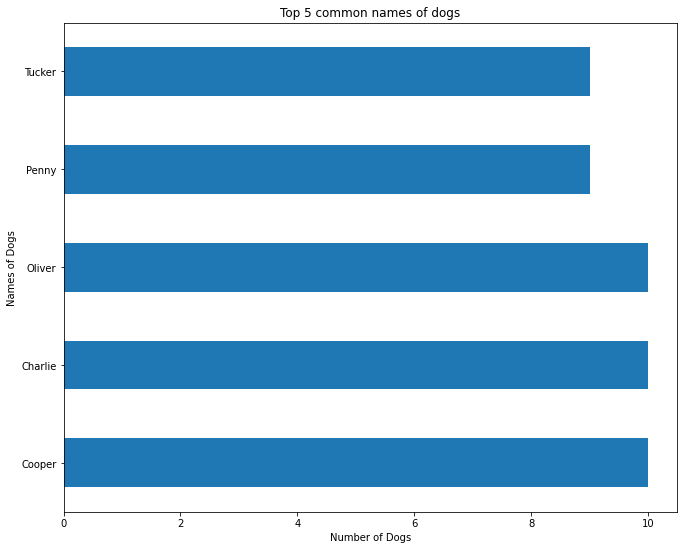

In [81]:
topnames=clean_df.name.value_counts().iloc[:5]
tn=topnames.plot(kind='barh', title='Top 5 common names of dogs')
tn.set_xlabel("Number of Dogs")
tn.set_ylabel("Names of Dogs")
plt.savefig('topdognames')

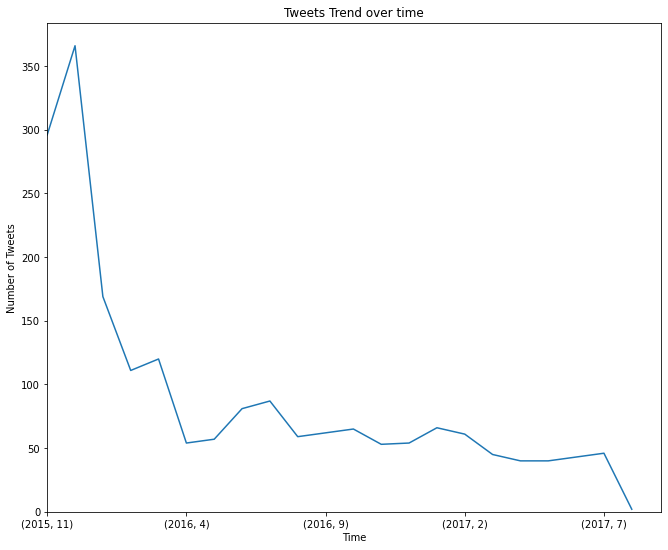

In [82]:

tt = clean_df.tweet_id.groupby([clean_df["timestamp"].dt.year, clean_df["timestamp"].dt.month]).count()
ttgraph = tt.plot(kind='line', title='Tweets Trend over time')
ttgraph.set_xlabel("Time")
ttgraph.set_ylabel("Number of Tweets")
ttgraph.set_ylim(0,)
ttgraph.set_xlim(0,)
plt.savefig('TweetTrend')

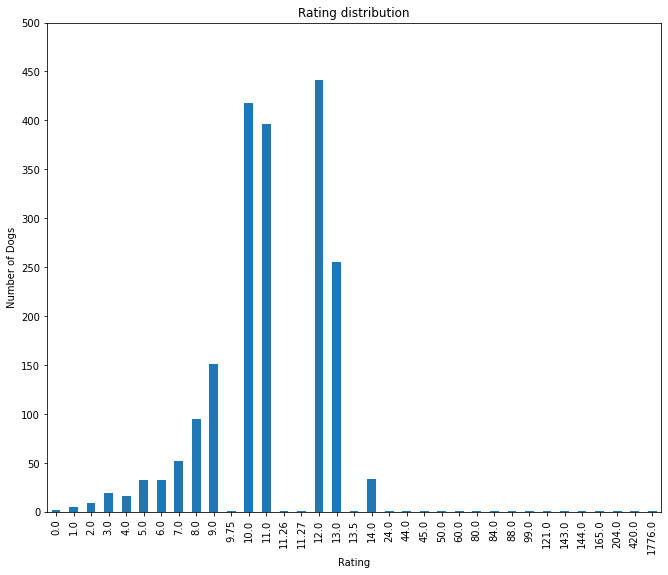

In [83]:
numgraph= clean_df.rating_numerator.value_counts().sort_index().plot(kind='bar', title = 'Rating distribution')
numgraph.set_xlabel("Rating")
numgraph.set_ylabel("Number of Dogs")
numgraph.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450,500])
plt.savefig('rating')


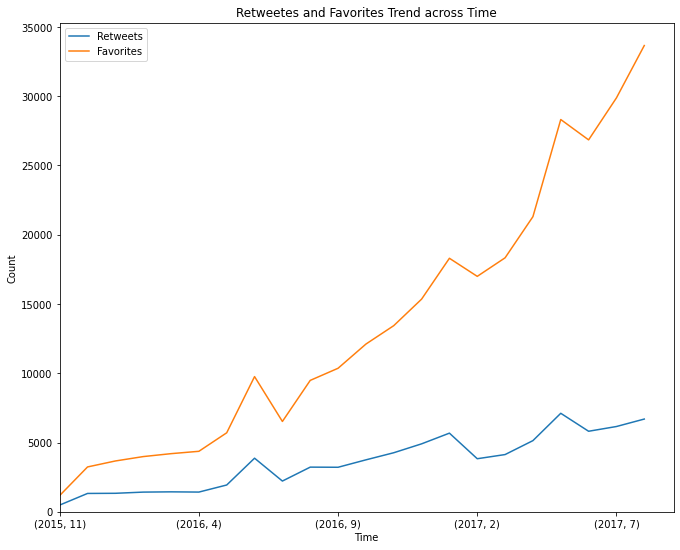

In [84]:
plt.subplots(1, sharex=True)
a=clean_df.retweet_count.groupby([clean_df["timestamp"].dt.year, clean_df["timestamp"].dt.month]).mean().plot(kind='line')
a=clean_df.favorite_count.groupby([clean_df["timestamp"].dt.year, clean_df["timestamp"].dt.month]).mean().plot(kind='line')
plt.title('Retweetes and Favorites Trend across Time')
plt.ylabel('Count')
plt.legend(('Retweets', 'Favorites'))
plt.xlabel('Time')
a.set_ylim(0,)
a.set_xlim(0,)
plt.savefig('favret')

## References:
- https://stackoverflow.com/questions/9626298/matplotlib-chart-creating-horizontal-bar-chart
- https://stackoverflow.com/questions/37514686/how-to-plot-a-bar-graph-from-a-pandas-series
- https://stackoverflow.com/questions/46414812/how-to-set-starting-point-for-matplotlib-x-axis
- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object